## Initialisation

### Dependencies

#### Third party

In [1]:
import numpy as np
from matplotlib import pyplot as plt

#### Personal Notebook

Enter the value of engineering strain upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in dataset: 0.01
Enter the value of engineering stress upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in dataset: 200
Young's Modulus: 29.069165948552968 GPa
17964 594
Yield Strength: 235.10488199999998 MPa
Ultimate Tensile Strength is 362.20079200000004 MPa at 18.095% elongation.


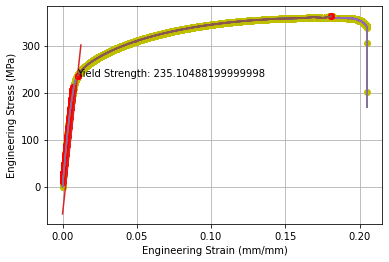

In [2]:
import ipynb

from ipynb.fs.full.dataset_initialisation import (
    OUTPUT_DIR,
)

from ipynb.fs.full.engineering_strain_stress import (
    x,
    y_smooth,
    start,
    end,
    youngs_modulus,
    save_fig,
    save_parameter
)

### Notations

- $\sigma \rightarrow$ True Stress
- $\epsilon \rightarrow$ True Strain
- $\epsilon_{pl} \rightarrow$ True Plastic Strain
- $\sigma_{ys} \rightarrow$ Yield Strength
- $\sigma_{uts} \rightarrow$ Ultimate Tensile Strength
- $n \rightarrow$ Work hardening Exponent
- $E \rightarrow$ Young's Modulus
- $K \rightarrow$ Strength Coefficient
- $e \rightarrow$ Engineering Strain
- $s \rightarrow$ Engineering Stress
- $\theta \rightarrow$ Work hardening rate
- $\sigma - \sigma_{ys} \rightarrow$ Flow Stress

## Plot of True Strain v/s True Stress

### $\epsilon$ v/s $\sigma$

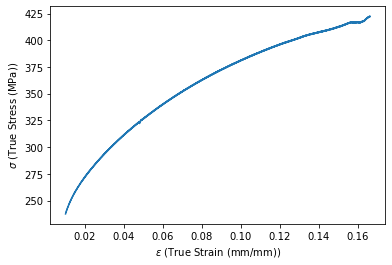

In [3]:
true_strain = np.log([i+1 for i in x[start:end]])
required_points = len(true_strain)
true_stress = [y_smooth[start+i]*(1+true_strain[i]) for i in range(required_points)]
_ = plt.plot(true_strain, true_stress)
_ = plt.xlabel('$\epsilon$ (True Strain (mm/mm))')
_ = plt.ylabel('$\sigma$ (True Stress (MPa))')
save_fig(plt, 'True stress vs strain')

## Plot of True Plastic Strain v/s True Stress


### Definition of true plastic strain

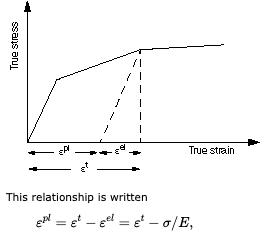

### $\epsilon_{pl}$ v/s $\sigma$


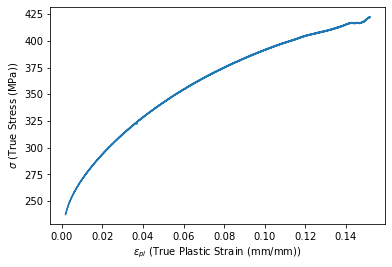

In [4]:
true_plastic_strain = [(true_strain[i] - true_stress[i]/youngs_modulus) for i in range(required_points)]
_ = plt.plot(true_plastic_strain, true_stress)
_ = plt.xlabel('$\epsilon_{pl}$ (True Plastic Strain (mm/mm))')
_ = plt.ylabel('$\sigma$ (True Stress (MPa))')
save_fig(plt, 'True stress vs plastic strain')